In [70]:
pip install pandas numpy matplotlib seaborn scikit-learn imblearn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [72]:
df = pd.read_csv('creditcard.csv')

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
df.shape

(284807, 31)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [76]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [77]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Visualization

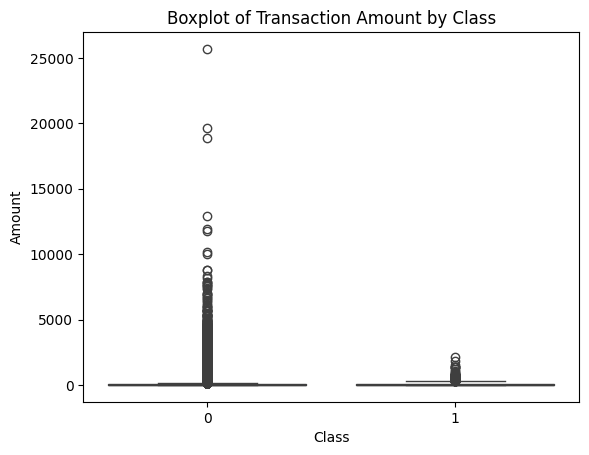

In [78]:
# Boxplot for 'Amount' feature grouped by class
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Transaction Amount by Class')
plt.show()


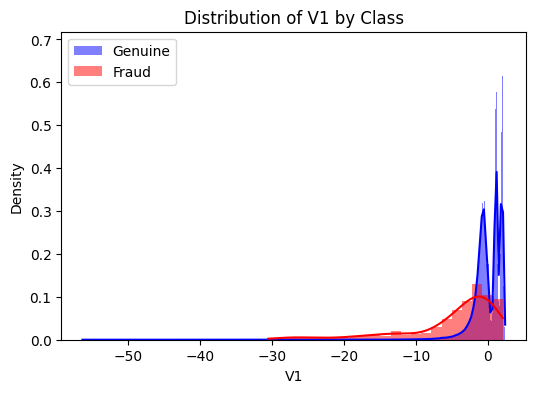

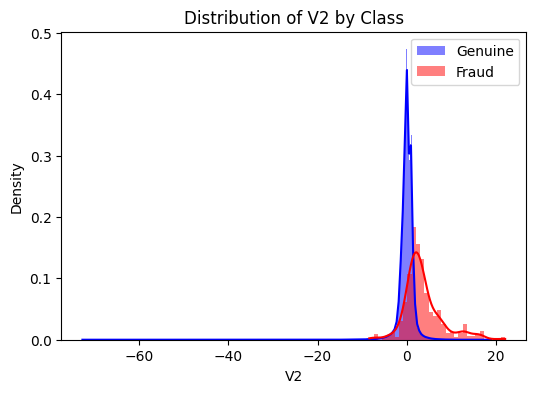

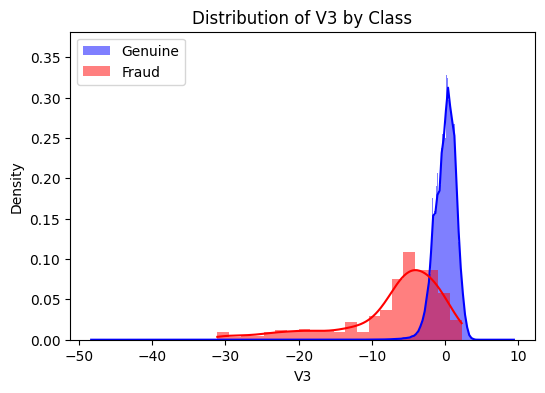

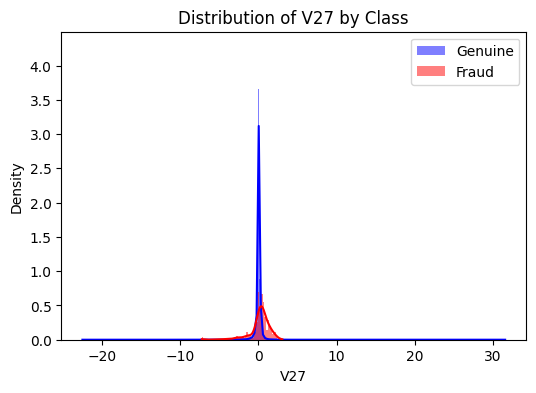

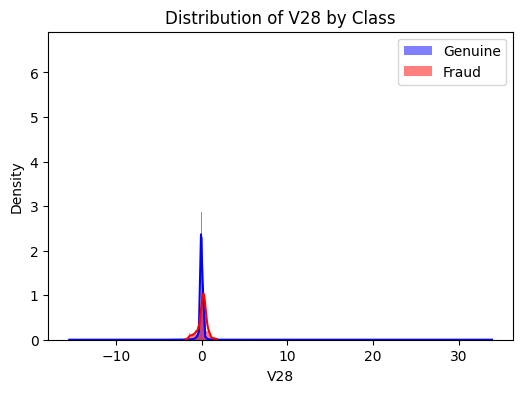

In [79]:
# Select a subset of features for visualization
features = ['V1', 'V2', 'V3', 'V27', 'V28']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['Class'] == 0][feature], color='blue', label='Genuine', kde=True, stat="density", linewidth=0)
    sns.histplot(df[df['Class'] == 1][feature], color='red', label='Fraud', kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {feature} by Class')
    plt.legend()
    plt.show()


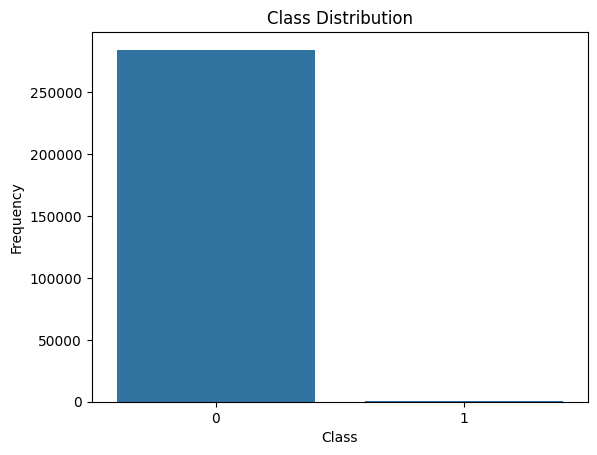

In [80]:
# Count plot of the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


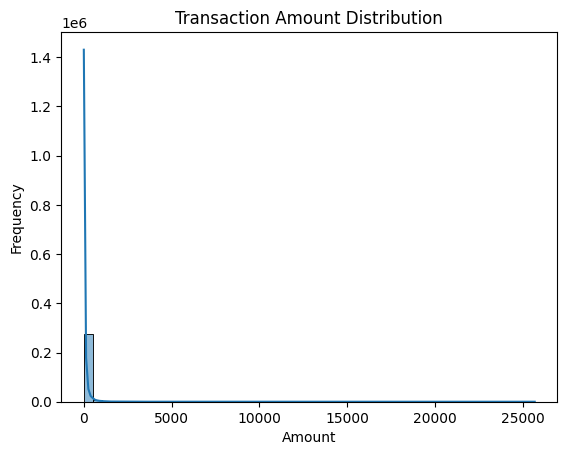

In [81]:
# Histogram of the 'Amount' feature
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


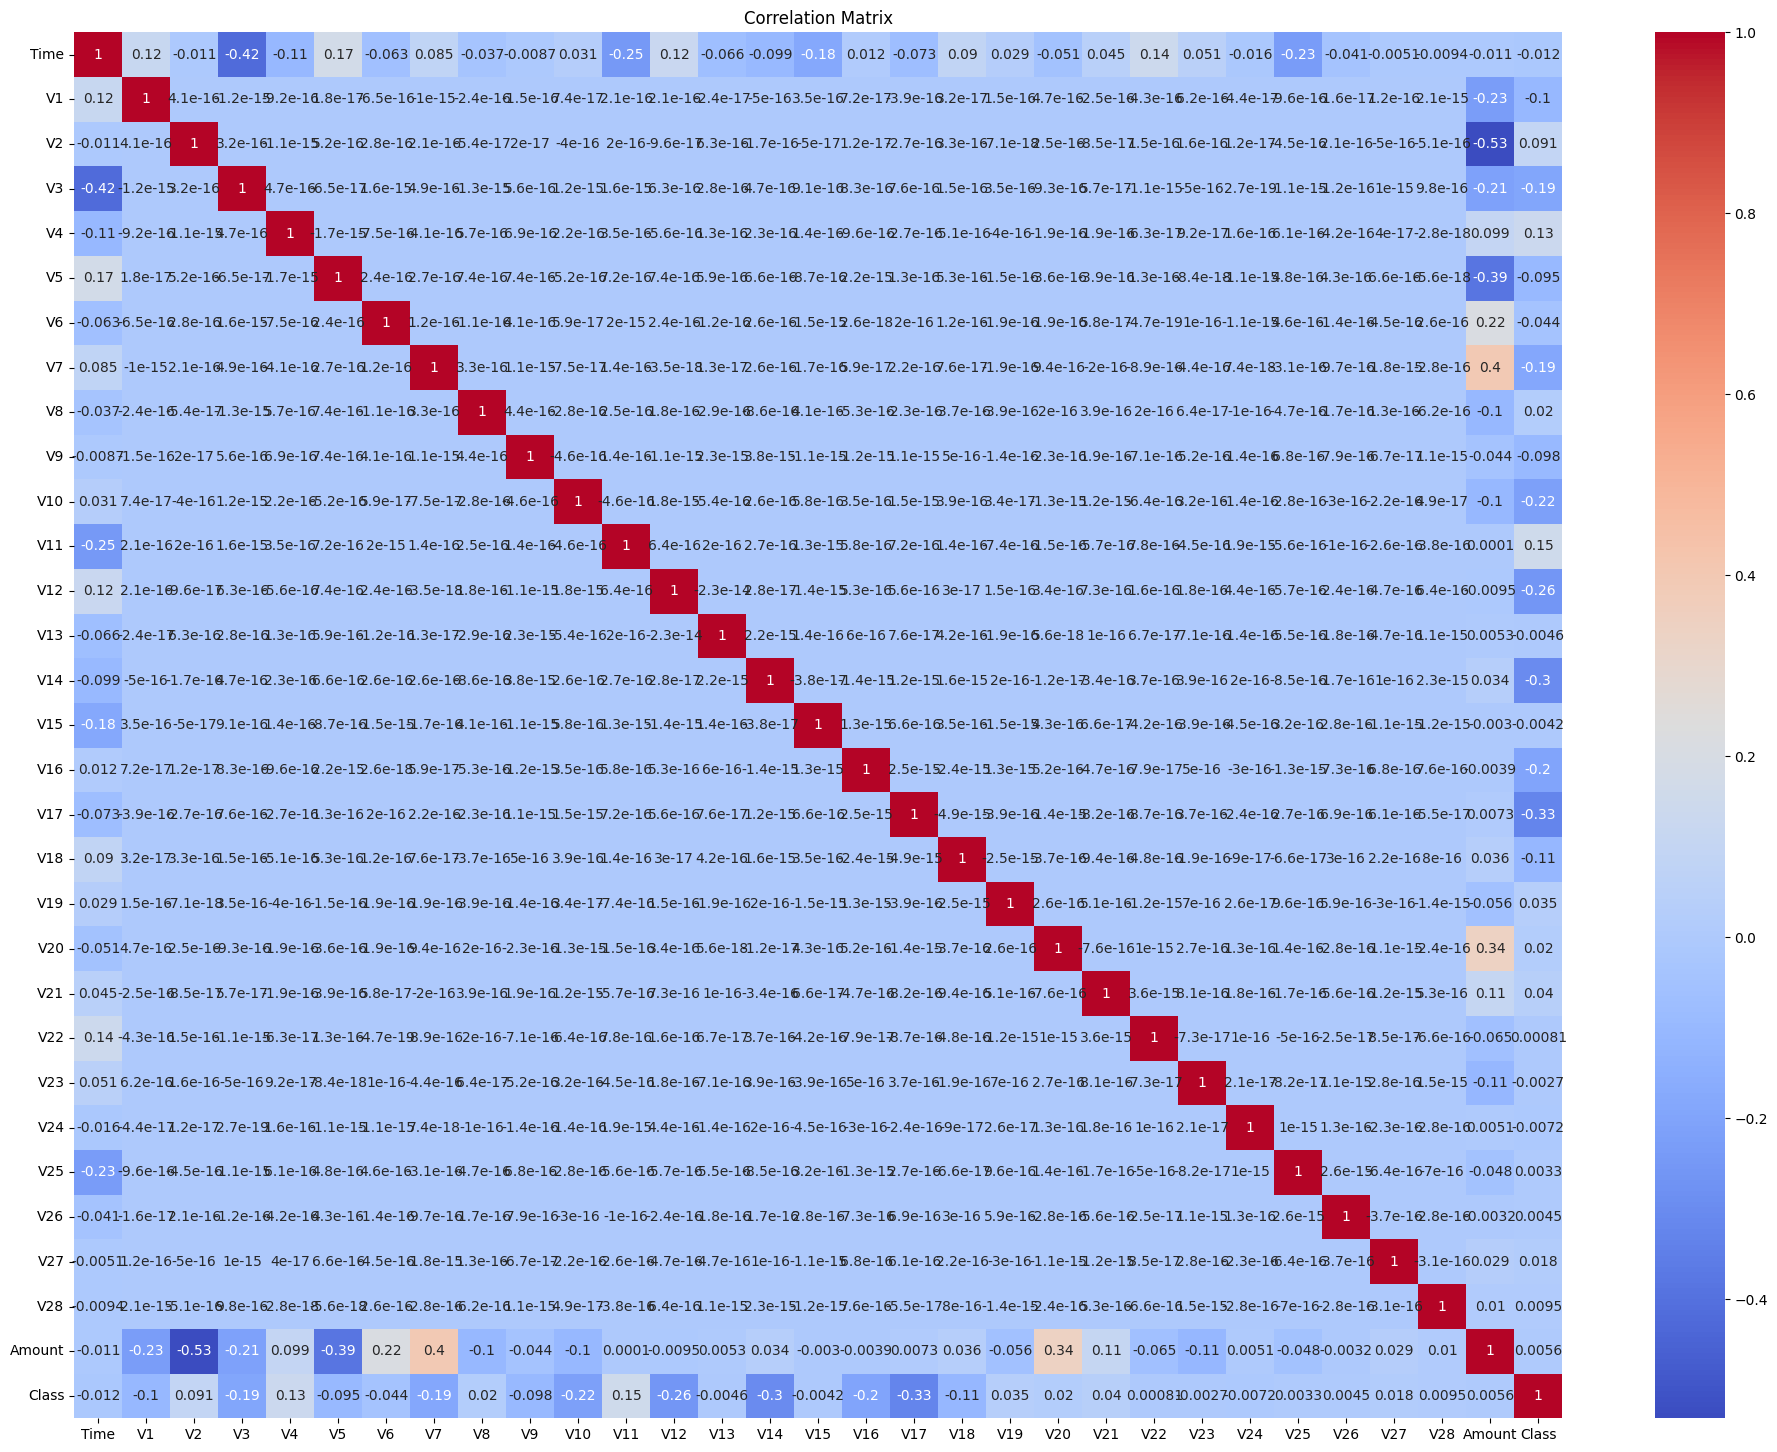

In [82]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(24, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [83]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


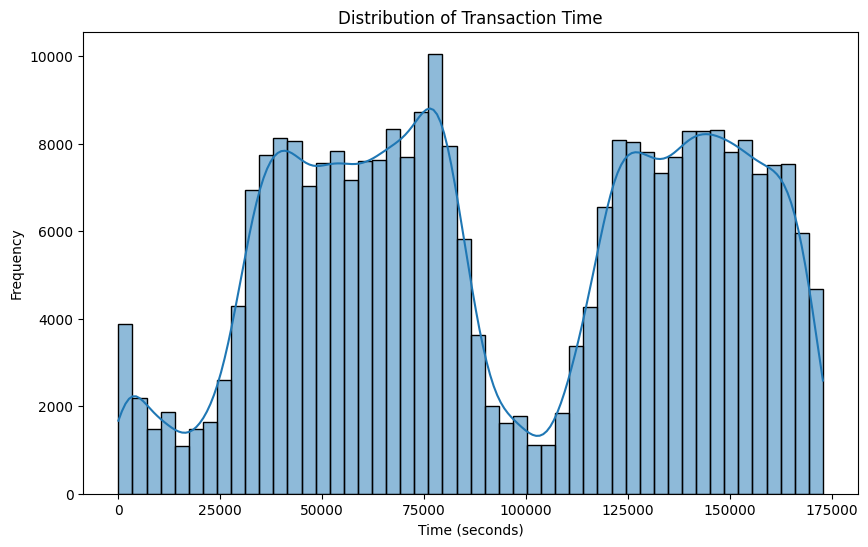

In [84]:
# Histogram of the 'Time' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


In [85]:
df.head(90)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
86,55.0,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,0.76,0
87,56.0,-0.847998,1.043459,1.267369,1.135529,0.021362,0.336914,0.398480,0.317399,-0.028658,...,-0.024046,0.215006,-0.131982,-0.007416,-0.136578,-0.242961,0.382931,0.276417,20.22,0
88,56.0,0.086996,-0.051989,-0.497882,-3.151908,2.558400,2.796671,0.470283,0.265333,0.919513,...,-0.239426,-0.437342,0.018426,1.013038,-0.258927,-0.293189,-0.394956,-0.435996,10.84,0


### Feature Engineering

In [86]:
# Assuming the 'Time' column is in seconds since the first transaction
df['Timedelta'] = pd.to_timedelta(df['Time'], unit='s')

# Extract days, hours, and minutes from the timedelta
df['Time_Day'] = df['Timedelta'].dt.days
df['Time_Hour'] = df['Timedelta'].dt.components['hours']
df['Time_Min'] = df['Timedelta'].dt.components['minutes']
df.head(120)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Timedelta,Time_Day,Time_Hour,Time_Min
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0 days 00:00:00,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0 days 00:00:00,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0 days 00:00:01,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0 days 00:00:01,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0 days 00:00:02,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.479120,-0.166937,0.081247,0.001192,1.18,0,0 days 00:01:14,0,0,1
116,75.0,-1.439069,0.267631,3.562770,3.481486,-1.160101,1.764781,-0.558817,0.442019,0.348431,...,0.130515,0.525668,-0.088950,0.113206,81.13,0,0 days 00:01:15,0,0,1
117,76.0,-1.024576,0.522289,1.787699,0.202672,-1.140803,-0.137831,-0.336555,0.670704,0.071670,...,-0.585131,0.325841,-0.068871,0.059713,50.00,0,0 days 00:01:16,0,0,1
118,76.0,-0.997176,0.228365,1.715340,-0.420067,0.560838,0.564725,0.846047,0.197491,-0.097202,...,-0.087682,0.138132,0.125902,-0.063022,86.43,0,0 days 00:01:16,0,0,1


In [87]:
# Log transformation of 'Amount' to reduce skewness
df['Log_Amount'] = np.log1p(df['Amount'])

# Robust scaling of 'Amount' to handle outliers
scaler = RobustScaler()
df['Scaled_Amount'] = scaler.fit_transform(df[['Amount']])


Skewness: 16.97763503663315
Kurtosis: 845.0777883188754
Skewness: 0.16270207082889335
Kurtosis: -0.6397064662524841
Skewness: 16.977635036633128
Kurtosis: 845.0777883188738


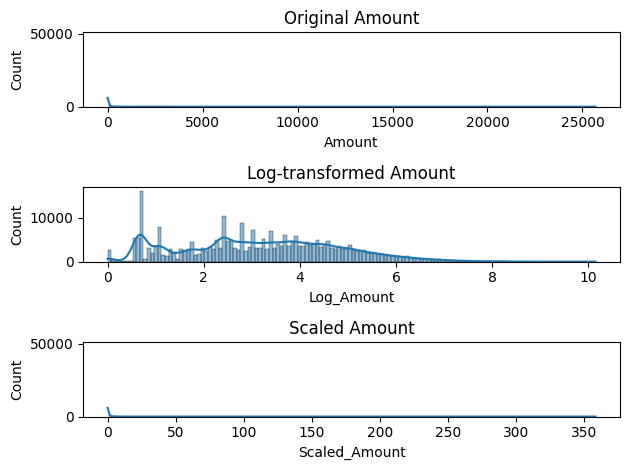

In [88]:

# Original Amount distribution
plt.subplot(3, 1, 1)
sns.histplot(df['Amount'], kde=True)
plt.title('Original Amount')
print(f"Skewness: {skew(df['Amount'])}")
print(f"Kurtosis: {kurtosis(df['Amount'])}")

# Log-transformed Amount distribution
plt.subplot(3, 1, 2)
sns.histplot(df['Log_Amount'], kde=True)
plt.title('Log-transformed Amount')
print(f"Skewness: {skew(df['Log_Amount'])}")
print(f"Kurtosis: {kurtosis(df['Log_Amount'])}")

# Scaled Amount distribution
plt.subplot(3, 1, 3)
sns.histplot(df['Scaled_Amount'], kde=True)
plt.title('Scaled Amount')
print(f"Skewness: {skew(df['Scaled_Amount'])}")
print(f"Kurtosis: {kurtosis(df['Scaled_Amount'])}")

plt.tight_layout()
plt.show()

### Feature Selection

In [89]:
# Drop the original 'Time' and 'Timedelta' columns
df.drop(columns=['Time', 'Timedelta'], inplace=True)

# Drop non-numeric columns and target variable
X = df.drop(columns=['Class', 'Amount'])
y = df['Class']

df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min,Log_Amount,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,5.014760,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1.305626,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,5.939276,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.221929,0.062723,0.061458,123.50,0,0,0,0,4.824306,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.502292,0.219422,0.215153,69.99,0,0,0,0,4.262539,0.670579
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.105915,0.253844,0.081080,3.67,0,0,0,0,1.541159,-0.256131
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.257237,0.034507,0.005168,4.99,0,0,0,0,1.790091,-0.237686
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.051634,-1.206921,-1.085339,40.80,0,0,0,0,3.732896,0.262698
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.384157,0.011747,0.142404,93.20,0,0,0,0,4.545420,0.994900
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.094199,0.246219,0.083076,3.68,0,0,0,0,1.543298,-0.255991


In [90]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Time_Day,Time_Hour,Time_Min,Log_Amount,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0,5.014760,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,0,1.305626,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,0,5.939276,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,0,4.824306,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,0,4.262539,0.670579


In [91]:
# Use SelectKBest to select the top features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new dataframe with selected features
df_selected = pd.DataFrame(X_new, columns=selected_features)
df_selected['Class'] = df['Class']


In [92]:
# Standard scaling of selected features
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected.drop(columns=['Class']))

# Create a new dataframe with scaled features
df_selected_scaled = pd.DataFrame(df_selected_scaled, columns=selected_features)
df_selected_scaled['Class'] = df['Class']


In [93]:
df.head(190)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min,Log_Amount,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,5.014760,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1.305626,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,5.939276,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.221929,0.062723,0.061458,123.50,0,0,0,0,4.824306,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.502292,0.219422,0.215153,69.99,0,0,0,0,4.262539,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,-0.505728,0.666300,1.080993,-0.447630,1.039490,0.184017,0.882797,-0.142340,-0.608661,0.038170,...,0.259685,0.150573,-0.042581,40.00,0,0,0,2,3.713572,0.251520
186,0.968784,-0.501798,-1.333558,0.388804,2.036091,3.661714,-0.236795,0.809586,0.154501,-0.089283,...,-0.342889,-0.003467,0.039004,160.86,0,0,0,2,5.086732,1.940334
187,-0.614586,0.975396,1.689027,-0.170483,-0.152020,-0.698487,0.726557,-0.067588,-0.126745,0.412887,...,0.022419,0.199155,-0.054699,8.93,0,0,0,2,2.295560,-0.182631
188,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,...,-0.189030,0.000208,0.026167,6.24,0,0,0,2,1.979621,-0.220219


### Split the Data into Training and Testing Sets

In [94]:
# Separate features and target variable
X = df_selected_scaled.drop(columns=['Class'])
y = df_selected_scaled['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Address Class Imbalance

In [95]:
# Define oversampling and undersampling strategy
oversample = SMOTE(sampling_strategy=0.1)  # Oversample minority class to 10% of majority class
undersample = RandomUnderSampler(sampling_strategy=0.5)  # Undersample majority class to 50%

# Create a pipeline
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Apply the pipeline to the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after resampling:
Class
0    45490
1    22745
Name: count, dtype: int64


### Train Classification Models

In [96]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.91      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix
[[56132   732]
 [    9    89]]


In [97]:
# Train Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix
[[56861     3]
 [   22    76]]


### Evaluate Model Performance

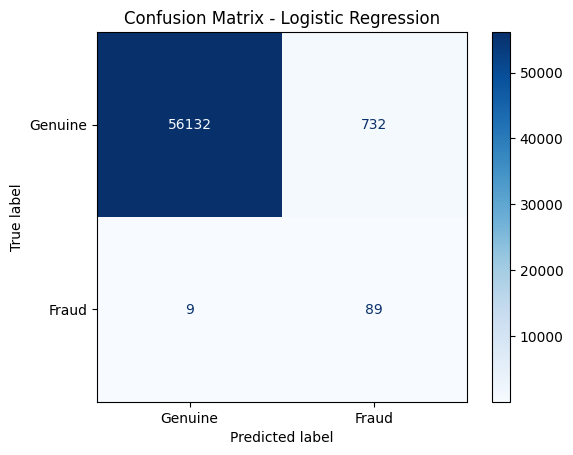

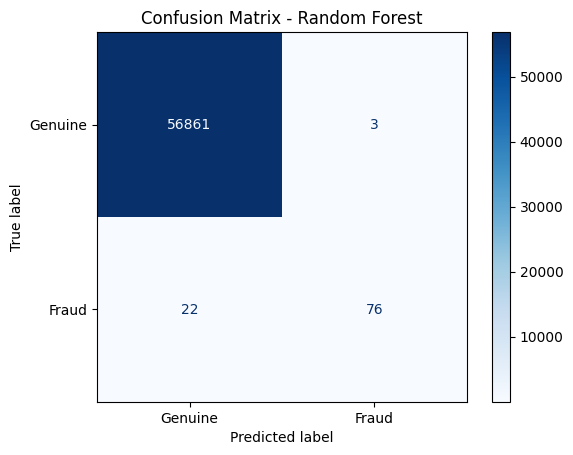

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Genuine', 'Fraud'])
disp_log_reg.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Genuine', 'Fraud'])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


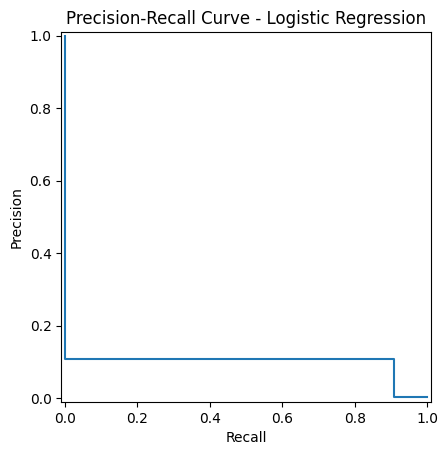

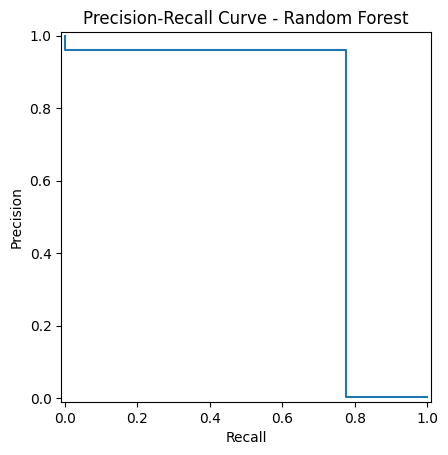

In [99]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_log_reg)
pr_display_log_reg = PrecisionRecallDisplay(precision=precision_log_reg, recall=recall_log_reg)
pr_display_log_reg.plot()
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_display_rf = PrecisionRecallDisplay(precision=precision_rf, recall=recall_rf)
pr_display_rf.plot()
plt.title('Precision-Recall Curve - Random Forest')
plt.show()


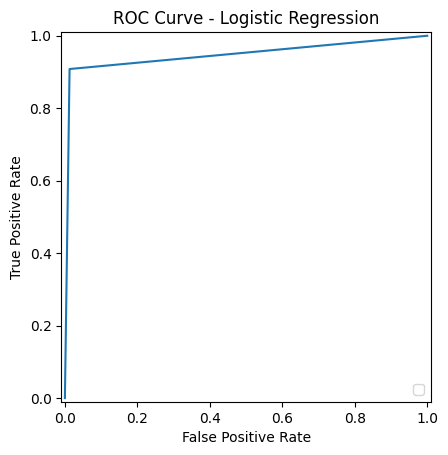

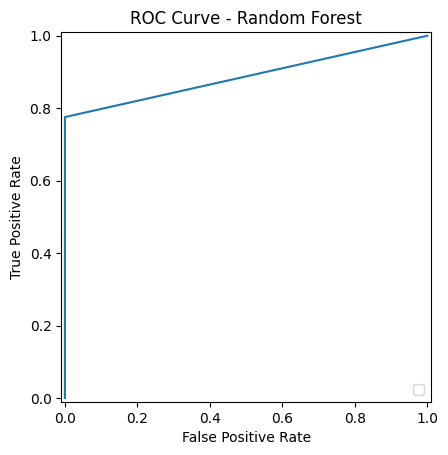

In [100]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_display_log_reg = RocCurveDisplay(fpr=fpr_log_reg, tpr=tpr_log_reg)
roc_display_log_reg.plot()
plt.title('ROC Curve - Logistic Regression')
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_display_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf)
roc_display_rf.plot()
plt.title('ROC Curve - Random Forest')
plt.show()


In [101]:
# Define the RepeatedKFold cross-validator
n_splits = 5  
n_repeats = 10  
random_state = None 

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
# Define the StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

In [102]:
# Define the scoring metric
scorer = make_scorer(f1_score, pos_label=1)  

In [103]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform cross-validation
log_reg_scores = cross_val_score(log_reg, X, y, scoring=scorer, cv=rkf, n_jobs=-1)

# Print the cross-validation results
print("Logistic Regression F1-scores: ", log_reg_scores)
print("Mean F1-score: ", np.mean(log_reg_scores))
print("Standard Deviation of F1-scores: ", np.std(log_reg_scores))


Logistic Regression F1-scores:  [0.75151515 0.66233766 0.6440678  0.71515152 0.79096045 0.73333333
 0.69333333 0.71604938 0.68571429 0.71345029 0.69565217 0.65771812
 0.67878788 0.73170732 0.77714286 0.72631579 0.69736842 0.6875
 0.72392638 0.74452555 0.71084337 0.70658683 0.76923077 0.68918919
 0.69662921 0.7721519  0.68148148 0.7715736  0.67045455 0.67065868
 0.72432432 0.73142857 0.71428571 0.66165414 0.72093023 0.75609756
 0.73291925 0.65882353 0.73939394 0.67045455 0.71698113 0.6993865
 0.71676301 0.7311828  0.69736842 0.74698795 0.72826087 0.71523179
 0.69135802 0.6547619 ]
Mean F1-score:  0.7114790295933634
Standard Deviation of F1-scores:  0.03463428333047213


In [104]:
# Initialize the Random Forest model with adjusted parameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt')

# Perform cross-validation
rf_scores = cross_val_score(rf_clf, X, y, scoring=scorer, cv=5, n_jobs=-1)

# Print the cross-validation results
print("Random Forest F1-scores: ", rf_scores)
print("Mean F1-score: ", np.mean(rf_scores))
print("Standard Deviation of F1-scores: ", np.std(rf_scores))


Random Forest F1-scores:  [0.77477477 0.85549133 0.73333333 0.9        0.79268293]
Mean F1-score:  0.811256472883429
Standard Deviation of F1-scores:  0.059295940384564316


### StratifiedKFold cross-validator

In [105]:
rf_clf = RandomForestClassifier()
rf_clf_fast = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt')

In [106]:
# Function to perform cross-validation and store results
def cross_val_results(model, X, y, cv, scorer):
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores

# Perform cross-validation for Logistic Regression
log_reg_scores = cross_val_results(log_reg, X, y, StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scorer)
log_reg_results = {
    'Model': 'Logistic Regression',
    'F1 Scores': log_reg_scores,
    'Mean F1 Score': np.mean(log_reg_scores),
    'Std Dev F1 Score': np.std(log_reg_scores)
}

# Perform cross-validation for Random Forest with adjusted parameters
rf_scores = cross_val_results(rf_clf_fast, X, y, StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scorer)
rf_results = {
    'Model': 'Random Forest (Fast)',
    'F1 Scores': rf_scores,
    'Mean F1 Score': np.mean(rf_scores),
    'Std Dev F1 Score': np.std(rf_scores)
}

# Create a DataFrame to display the results
df_Results = pd.DataFrame([log_reg_results, rf_results])

In [107]:
df_Results

,Model,F1 Scores,Mean F1 Score,Std Dev F1 Score
0,Logistic Regression,"[0.6790123456790124, 0.7017543859649122, 0.687...",0.711063,0.028345
1,Random Forest (Fast),"[0.8379888268156425, 0.8651685393258427, 0.877...",0.858725,0.013096


### Train the models

In [113]:
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

In [115]:
# Calculate test data accuracy for both models
test_data_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg) * 100
test_data_accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100


In [116]:
# Print test data accuracy
print(f"Test Data Accuracy (Logistic Regression): {test_data_accuracy_log_reg:.2f}%")
print(f"Test Data Accuracy (Random Forest): {test_data_accuracy_rf:.2f}%")

Test Data Accuracy (Logistic Regression): 99.91%
Test Data Accuracy (Random Forest): 99.96%
